<a href="https://colab.research.google.com/github/coryellj4/4540/blob/main/Random_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Random Noise

White noise is a random selecection of valuse usally from a normal ditriburtion<br><br>
Brown noise is a ranning total of white noise and is called random walk noise as it walks "up" and "down" with positive and negitve values from the white noise <br><br>
Pink Noise is type of signal where power decreases with frequency, specifically by 3 dB per octave. It’s often described as having equal energy per octave.

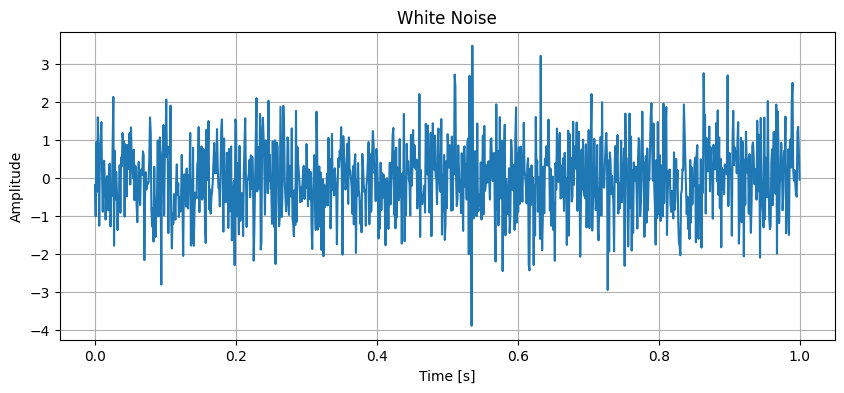

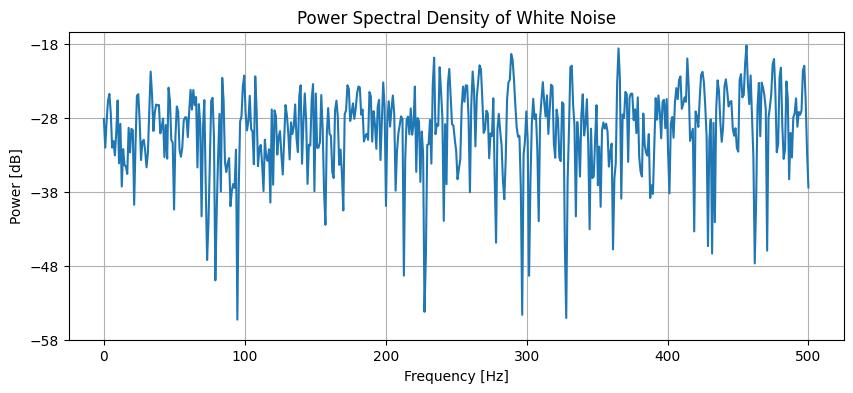

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency (Hz)
T = 1      # Duration of the signal in seconds
N = fs * T # Number of samples

# Generate white noise
white_noise = np.random.normal(0, 1, N)

# Plot white noise
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, T, N), white_noise)
plt.title('White Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Display the power spectral density
plt.figure(figsize=(10, 4))
plt.psd(white_noise, NFFT=1024, Fs=fs)
plt.title('Power Spectral Density of White Noise')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [dB]')
plt.show()


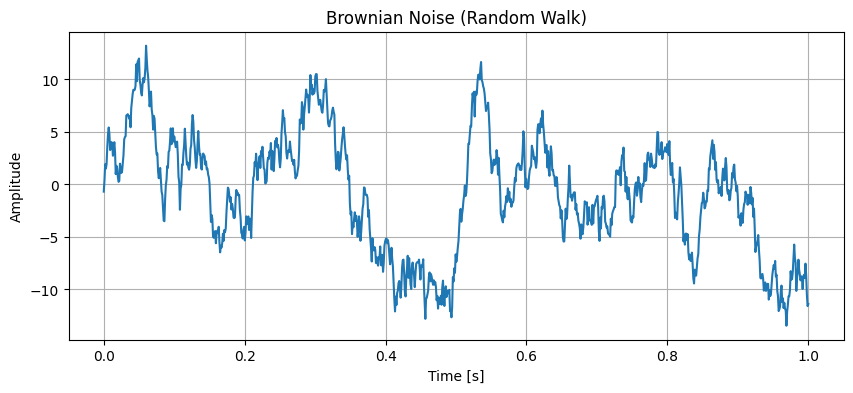

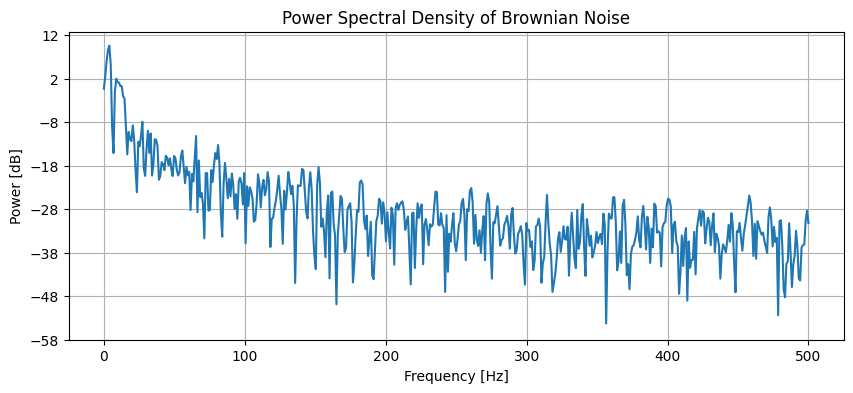

In [5]:
# Generate Brownian noise (random walk)
brownian_noise = np.cumsum(np.random.normal(0, 1, N))

# Plot Brownian noise
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, T, N), brownian_noise)
plt.title('Brownian Noise (Random Walk)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Display the power spectral density
plt.figure(figsize=(10, 4))
plt.psd(brownian_noise, NFFT=1024, Fs=fs)
plt.title('Power Spectral Density of Brownian Noise')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [dB]')
plt.show()

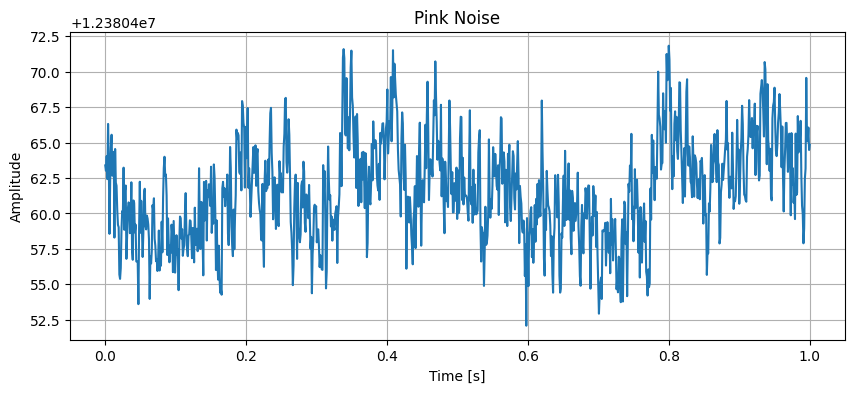

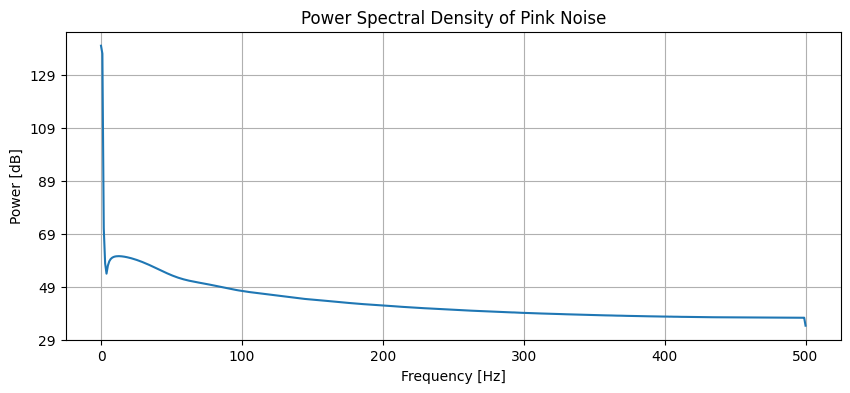

In [6]:
def generate_pink_noise(N):
    # Generate white noise
    white_noise = np.random.normal(0, 1, N)

    # Apply a simple 1/f filter to approximate pink noise
    freqs = np.fft.fftfreq(N)
    # Create a spectral shape for pink noise (1/f)
    pink_noise_spectrum = np.fft.fft(white_noise)
    pink_noise_spectrum = pink_noise_spectrum / (np.sqrt(np.abs(freqs))+0.0000000001)  # Apply 1/f scaling
    pink_noise = np.fft.ifft(pink_noise_spectrum)

    return np.real(pink_noise)

# Generate Pink Noise
pink_noise = generate_pink_noise(N)

# Plot Pink Noise
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, T, N), pink_noise)
plt.title('Pink Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Display the power spectral density
plt.figure(figsize=(10, 4))
plt.psd(pink_noise, NFFT=1024, Fs=fs)
plt.title('Power Spectral Density of Pink Noise')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [dB]')
plt.show()
